## PHYS 105A:  Introduction to Scientific Computing

# Assignment: Monte Carlo Integration

In this assignment, we will learn how to compute $\pi$ using a Monte Carlo method.

In [2]:
# Step 1. Import Libraries

from math import pi
import random as rnd
from matplotlib import pyplot as plt

print('π =', pi)

π = 3.141592653589793


The idea of using Monte Carlo to compute $\pi$ is very simple.  We use the facts that

* The area of a circle is $A_\mathrm{circle} = \pi r^2$
* The area of the enclosing square is $A_\mathrm{square} = 4r^2$

the *ratio* between the circle and the square is:

* $\pi/4 = A_\mathrm{circle}/A_\mathrm{square} = A_\mathrm{red}/A_\mathrm{box}$ 

For simplicity, we can use unit circle in this calculation

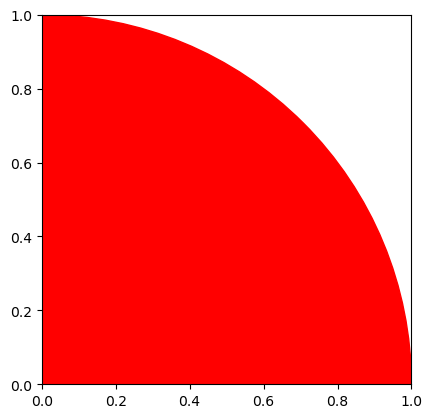

In [3]:
fig, ax = plt.subplots()
ax.add_patch(plt.Circle((0, 0), 1, color='r'))
ax.get_xaxis().set_visible(True)
ax.get_yaxis().set_visible(True)
ax.set_aspect('equal')

In [4]:
# Step 2. Generate one random point within the 1x1 box
#
# We already learn from the lecture that python's rnd.random() function
# returns a random number in [0,1).
#
# Let's now use rnd.random() to generate a random point with (x, y)
# coordinates.

def random_point():
    return rnd.random(), rnd.random()

# Once you finish the above function, you should be able to create a
# random point by simply calling the function

x, y = random_point() # remember tuple expansion?
print(x,y)

0.9588490383882834 0.9157633992116071


In [5]:
# Step 3 (assignment). Check if a point is in the quarter circle

def inside(x, y):
    return x**2 + y**2 <= 1


    # ~~~~~~~~~~~~~~~~ # how can you check if the point (x, y)
                              # falls inside a unit circle?

In [6]:
# Step 4 (assignment). Count the number of points inside the quarter circle

n_sample = 1000
n_inside = 0
for i in range(n_sample):
    point = random_point()
    x , y = point
    if inside(x,y):
        n_inside += 1
    # Hints: first create a random point using your random_point() function.
    # And then check if your random point is inside the quarter circle using
    # your inside() function.  Add one to n_inside if the point is inside.
    # ~~~~~~~~~~~~~~~~

print(n_inside)

798


In [7]:
# Step 5. Compute the approximation of pi based on n_inside and n_sample

mypi = n_inside/n_sample # what formula did we derive to approximate pi?

print(4*mypi)

3.192


In [8]:
# Step 6 (assignment). Put steps 4 and 5 into a single function.
#
# The above calculation works!  However, it will be nice to put them into
# a single function so we can simply pass in the number of sample to it and
# get the result

def montecarlo_pi(n_sample=1000):
    n_inside = sum(1 for _ in range(n_sample) if inside(*random_point()))
    return 4 * n_inside / n_sample# ~~~~~~~~~~~~~~~~ # Hint: Step 5

# You may now call `montecarlo_pi()` to get an approximation of pi
print(montecarlo_pi())

3.248


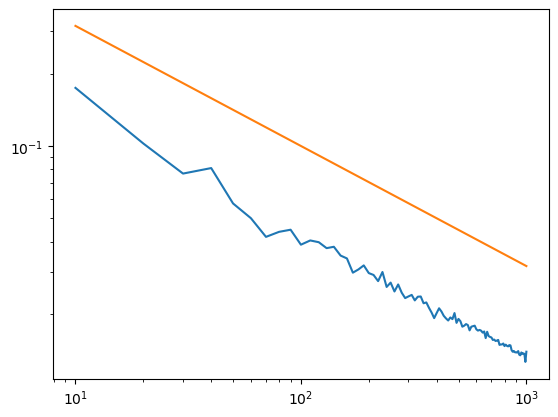

In [9]:
# Step 7. Compute how good/bad is montecarlo_pi() to approximate pi
#
# We did the same thing in the lecture "montecarlo.ipynb"
# Basically, we want to plot the error as a function of the numbers of samples

N_sample = [10 * i for i in range(1, 100+1)]  # Adjusted range for quicker testing

Error = []
for n_sample in N_sample:
    total_error = sum(abs(montecarlo_pi(n_sample) - pi) / pi for i in range(n_sample))
    Error.append(total_error / n_sample)

# Step 4. Plot Results
plt.loglog(N_sample, Error)
plt.loglog(N_sample, [n_sample**(-0.5) for n_sample in N_sample])
plt.show()